In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size

In [3]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    """
    
    fig = plt.figure()
    plt.plot(x, y, 'ro', ms=10, mec='k')

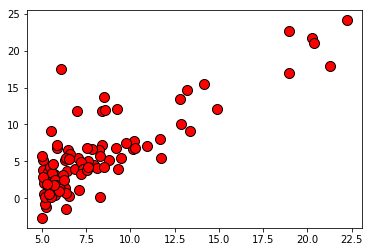

In [4]:
X = np.stack([np.ones(m), X], axis=1)
plotData(X[:, 1], y)

In [5]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    squared_errors = np.array([ (np.transpose(theta) @ np.transpose(X[i, :]) - y[i]) ** 2
                      for i in range(m) ])
    
    J = np.sum(squared_errors) / (2 * m)
    # ===========================================================
    return J

In [6]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [8]:
def gradientDescentMultiplicative(X, y, theta, alpha, num_iters, plot=False):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for iter_num in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        new_thetas = np.zeros(theta.shape[0])
        
        
        def error_j(j):
            error_value = np.sum([(theta[j] * X[i, j] - y[i]) ** 2
                            for i in range(m)])
            
            # print(f'error{str(j)}: {str(error_value)}')
            return error_value
        
        
        def partial_error_j(j):
            partial_value = np.sum([(theta[j] * X[i, j] - y[i]) * X[i, j] 
                            for i in range(m)])
            
            # print(f'partial error{str(j)}: {str(partial_value)}')
            return partial_value
        
        
        for j in range(X.shape[1]):
            new_thetas[j] = theta[j] * (alpha ** (-2 * theta[j] * partial_error_j(j) / error_j(j)))

        theta = new_thetas.copy()
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    if plot:
        fig = plt.figure()
        plt.plot(range(num_iters), J_history)
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost(J)')
    
    return theta, J_history

Theta found by gradient descent: -1.9999, 0.9998
Expected theta values (approximately): [-3.6303, 1.1664]


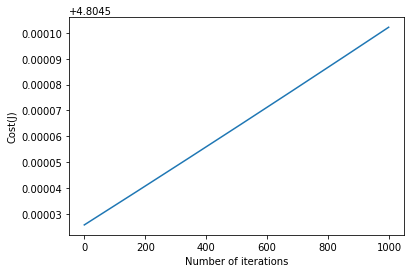

In [14]:
# initialize fitting parameters
theta = np.array([-2, 1])

# some gradient descent settings
iterations = 1000
alpha = 1.0000001

theta, J_history = gradientDescentMultiplicative(X ,y, theta, alpha, iterations, plot=True)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

In [64]:
J_history

[307896.9816160742,
 1345098574.0595627,
 5362509402632.736,
 2.1349013579868784e+16,
 8.499198418303361e+19,
 3.383591853410552e+23,
 1.34703217918993e+27,
 5.362631695025767e+30,
 2.134902130827258e+34,
 8.499198467122714e+37,
 3.3835918537188506e+41,
 1.3470321791918767e+45,
 5.362631695025886e+48,
 2.1349021308272646e+52,
 8.499198467122741e+55,
 3.383591853718854e+59,
 1.3470321791918781e+63,
 5.36263169502591e+66,
 2.1349021308272692e+70,
 8.499198467122781e+73,
 3.383591853718863e+77,
 1.3470321791918818e+81,
 5.362631695025913e+84,
 2.1349021308272694e+88,
 8.499198467122782e+91,
 3.383591853718871e+95,
 1.3470321791918817e+99,
 5.362631695025925e+102,
 2.1349021308272754e+106,
 8.499198467122802e+109,
 3.383591853718886e+113,
 1.3470321791918908e+117,
 5.362631695025944e+120,
 2.1349021308272807e+124,
 8.499198467122825e+127,
 3.3835918537188872e+131,
 1.347032179191891e+135,
 5.362631695025962e+138,
 2.1349021308272942e+142,
 8.49919846712288e+145,
 3.3835918537189034e+149,
 